# Pipeline Prediction

In [ ]:
import matplotlib.pyplot as plt
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn_genetic.plots import plot_fitness_evolution, plot_search_space
from sklearn_genetic.callbacks import LogbookSaver, ProgressBar
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Import the data and split it in train and test sets

In [2]:
data = load_digits()

y = data["target"]
X = data["data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Define the classifier to tune

In [3]:
clf = DecisionTreeRegressor()
pipe = Pipeline([("scaler", StandardScaler()), ("clf", clf)])

### Create the CV strategy and define the param grid

In [4]:
cv = KFold(n_splits=5, shuffle=True)

param_grid = {
    "clf__ccp_alpha": Continuous(0, 1),
    "clf__criterion": Categorical(["absolute_error", "squared_error"]),
    "clf__max_depth": Integer(2, 20),
    "clf__min_samples_split": Integer(2, 30)}

### Define the GASearchCV options

In [5]:
evolved_estimator = GASearchCV(
    estimator=pipe,
    cv=3,
    scoring="r2",
    population_size=15,
    generations=20,
    tournament_size=3,
    elitism=True,
    keep_top_k=4,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=param_grid,
    criteria="max",
    algorithm="eaMuCommaLambda",
    n_jobs=-1)

### Optionally, create some Callbacks

In [6]:
callbacks = [LogbookSaver(checkpoint_path="./logbook.pkl"), ProgressBar()]

### Fit the model and see some results

In [7]:
evolved_estimator.fit(X_train, y_train, callbacks=callbacks)
y_predict_ga = evolved_estimator.predict(X_test)
r_squared = r2_score(y_test, y_predict_ga)

  0%|          | 0/21 [00:00<?, ?it/s]gen	nevals	fitness  	fitness_std	fitness_max	fitness_min
0  	15    	0.0955103	0.186884   	0.548848   	-0.0221246 
100%|██████████| 21/21 [00:21<00:00,  1.36it/s]20 	27    	0.571849 	0.00104264 	0.57237    	0.569764   
22it [00:22,  1.02s/it]                        


In [8]:
print(evolved_estimator.best_params_)
print("r-squared: ", "{:.2f}".format(r_squared))
print("Best k solutions: ", evolved_estimator.hof)

{'clf__ccp_alpha': 0.07011694533363433, 'clf__criterion': 'squared_error', 'clf__max_depth': 14, 'clf__min_samples_split': 11}
r-squared:  0.54
Best k solutions:  {0: {'clf__ccp_alpha': 0.07011694533363433, 'clf__criterion': 'squared_error', 'clf__max_depth': 14, 'clf__min_samples_split': 11}, 1: {'clf__ccp_alpha': 0.07011694533363433, 'clf__criterion': 'squared_error', 'clf__max_depth': 20, 'clf__min_samples_split': 11}, 2: {'clf__ccp_alpha': 0.07011694533363433, 'clf__criterion': 'squared_error', 'clf__max_depth': 11, 'clf__min_samples_split': 11}, 3: {'clf__ccp_alpha': 0.07011694533363433, 'clf__criterion': 'squared_error', 'clf__max_depth': 14, 'clf__min_samples_split': 11}}


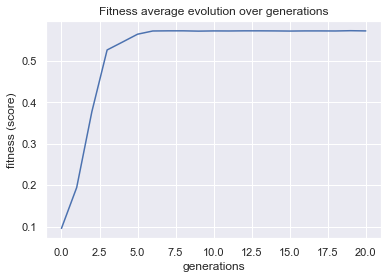

In [9]:
plot = plot_fitness_evolution(evolved_estimator, metric="fitness")
plt.show()

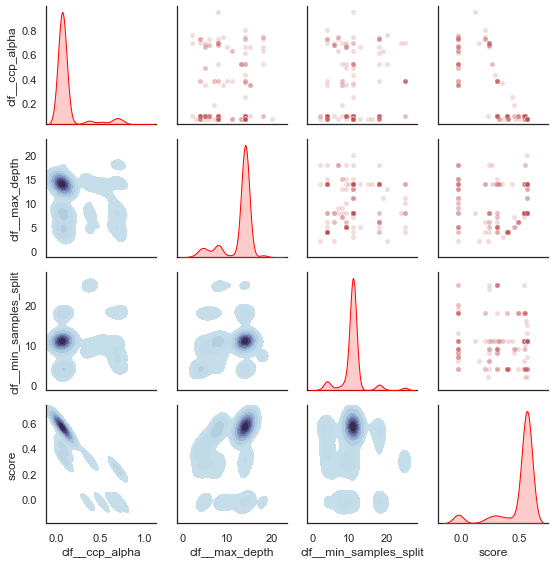

In [10]:
plot_search_space(evolved_estimator)
plt.show()